In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Make data numerical
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 2
data.head()

/home/manav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [4]:
#Drop non-required column
data.drop(columns = ['User ID'] )

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


In [5]:
#Check for nulls in data : If result in all rows is 0, it means no nulls
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

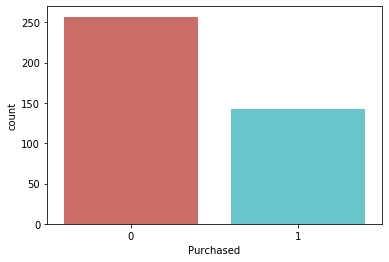

In [6]:
#Visualise target variable
data.Purchased.value_counts()
sns.countplot(x = 'Purchased', data = data, palette = 'hls')
plt.show()

In [7]:
x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = model.predict(x_test)

In [38]:
#A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
confusion_Matrix = print(metrics.confusion_matrix(y_test, y_pred))
#Diagonal ele represent accurate predictions, non-diagonnal ele are inaccurate predictions

[[69  3]
 [24  4]]


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.73
Precision: 0.5714285714285714
Recall: 0.14285714285714285


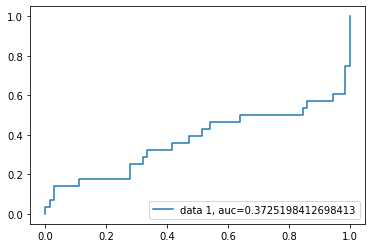

In [40]:
#Receiver Operating Characteristic(ROC) curve
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:
Gender2 = 1
Age2 = 50
EstimatedSalary2 = 40000
x2=np.array([Gender2,Age2,EstimatedSalary2])
x2=x2.reshape(1,-1)
print(x2)
y2=print(model.predict(x2))

[[    1    50 40000]]
[0]
